In [9]:
pwd

'/ghds/groups/labdesk/bshih'

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re

In [11]:
flow_cells = ['201023_NB552398_0033_AHHGV3BGXG',
              '201024_NB552393_0029_AHHGFMBGXG',
              '201027_NB552398_0034_AHHFJNBGXG']

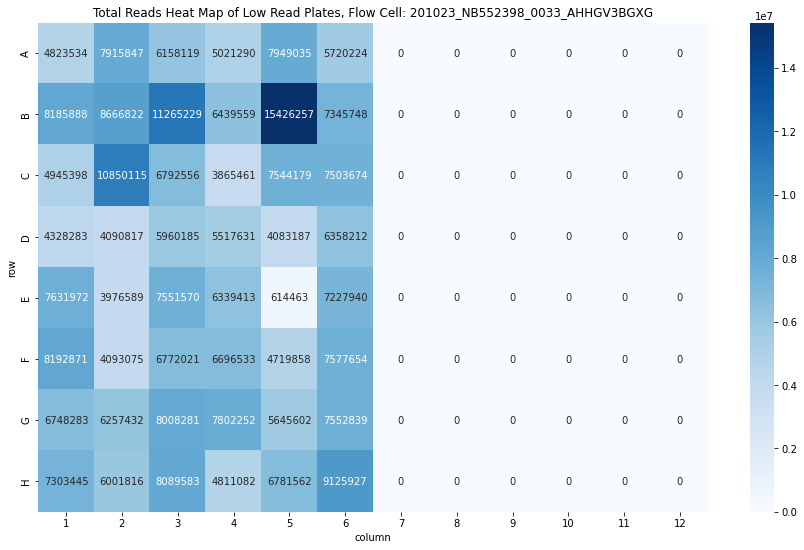

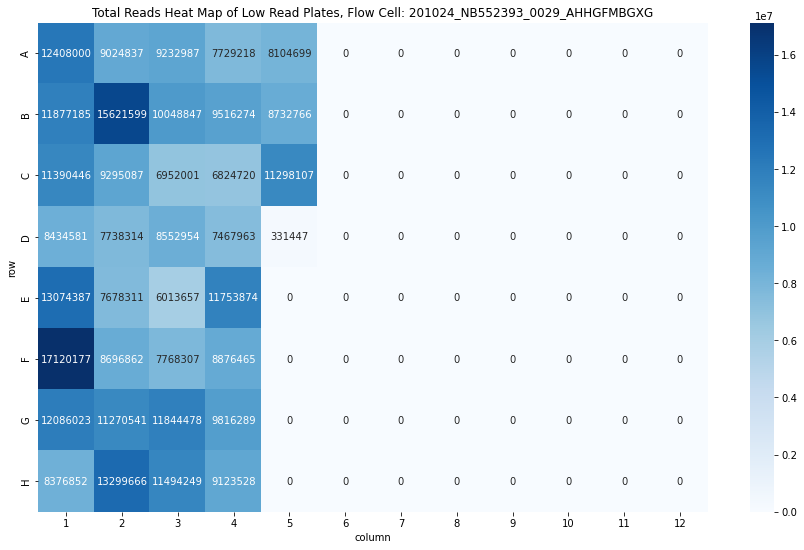

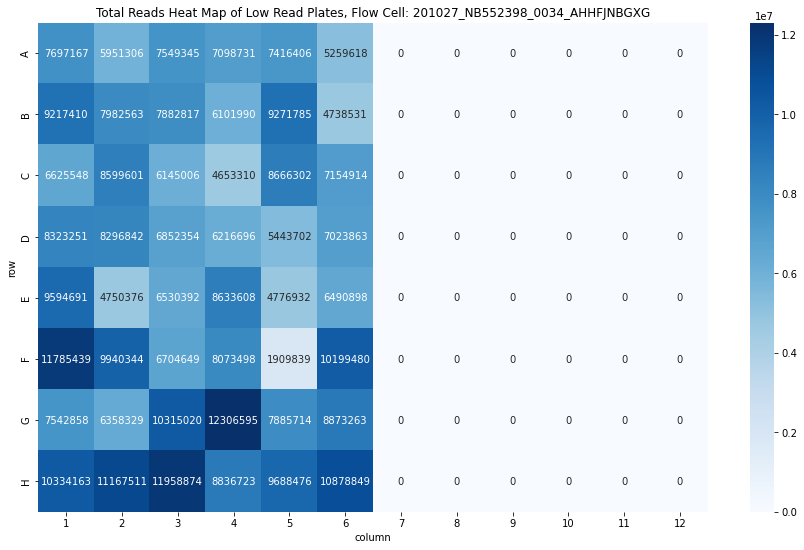

In [14]:
for i in flow_cells: 
    low_reads = pd.read_csv(f"/ghds/cv19/analysis/{i}/pool_stats.hdr.tsv", sep='\t').iloc[:,:4]

    row_position = []
    column_position = []

    for _, value in low_reads['pos_pooling'].items():
        row_position.append(value[14])
        column_position.append(value[15])

    low_reads['row'] = row_position
    low_reads['column'] = column_position
    low_reads = low_reads.iloc[:, 3:].pivot(index='row', columns='column', values='reads_total').fillna(0)

    for j in range(len(low_reads.columns) + 1, 13):
        low_reads[f'{j}'] = 0
    
    low_reads = low_reads.astype(dtype='int')
    
    fig, ax = plt.subplots(figsize=(15, 9))
    sns.heatmap(low_reads, annot=True, cmap='Blues', fmt='d')
    plt.title(f'Total Reads Heat Map of Low Read Plates, Flow Cell: {i}')
    plt.show()
    